In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle("../data/fd_vn_physical_with_tokens_and_pooled_output.pkl")

In [3]:
df.head(5)

,cc,sentence,syntax,fd,tokens,tokens_pt,tokens_ids,token_wise_output,pooled_output
0,"[{'text': 'cart', 'q_value': '+MER', 'index': ...",The grocery cart hit against the wall,Sbj V PathP,Autonomous Place,"[the, grocery, cart, hit, against, the, wall]","[[tensor(101), tensor(1996), tensor(13025), te...","[1996, 13025, 11122, 2718, 2114, 1996, 2813]","[[[tensor(-0.2603), tensor(0.5590), tensor(-0....","[[tensor(-0.8683), tensor(-0.2977), tensor(-0...."
1,"[{'text': 'type', 'q_value': '+MER', 'index': ...",That type of rope coiled easily around the post,Sbj V PathP,Autonomous Place,"[that, type, of, rope, coiled, easily, around,...","[[tensor(101), tensor(2008), tensor(2828), ten...","[2008, 2828, 1997, 8164, 24599, 4089, 2105, 19...","[[[tensor(-0.1397), tensor(-0.2141), tensor(0....","[[tensor(-0.7615), tensor(-0.0670), tensor(0.1..."
2,"[{'text': 'rope', 'q_value': '+MER', 'index': ...",The rope coiled around the post,Sbj V PathP,Autonomous Place,"[the, rope, coiled, around, the, post]","[[tensor(101), tensor(1996), tensor(8164), ten...","[1996, 8164, 24599, 2105, 1996, 2695]","[[[tensor(-0.0777), tensor(0.0408), tensor(0.1...","[[tensor(-0.6512), tensor(-0.0065), tensor(0.7..."
3,"[{'text': 'company', 'q_value': '+MER', 'index...",The company is wedging into new markets,Sbj V PathP,Autonomous Place,"[the, company, is, wed, ##ging, into, new, mar...","[[tensor(101), tensor(1996), tensor(2194), ten...","[1996, 2194, 2003, 21981, 4726, 2046, 2047, 6089]","[[[tensor(0.0615), tensor(0.1368), tensor(0.30...","[[tensor(-0.8246), tensor(-0.1659), tensor(0.2..."
4,"[{'text': 'computer', 'q_value': '+MER', 'inde...",The computer connected well to the network,Sbj V PathP,Autonomous Place,"[the, computer, connected, well, to, the, netw...","[[tensor(101), tensor(1996), tensor(3274), ten...","[1996, 3274, 4198, 2092, 2000, 1996, 2897]","[[[tensor(-0.0860), tensor(-0.0513), tensor(0....","[[tensor(-0.6017), tensor(-0.1227), tensor(0.6..."


In [4]:
pooled_output = df["pooled_output"]
pooled_output.shape

(560,)

In [5]:
pooled_output.values.reshape(-1)[0].shape

torch.Size([1, 768])

In [6]:
p_output = pooled_output.values
p = np.stack(p_output).reshape(560,768)

In [7]:
p.shape

(560, 768)

In [8]:
pca = PCA(n_components=3)
fd_pca = pca.fit(p).transform(p)

In [9]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.76377106 0.06172466 0.04535156]


In [10]:
fd_pca.shape

(560, 3)

In [11]:
fac0, fac1, fac2 = fd_pca.transpose()
fd_comp = [(f, i, j) for f, i, j in zip(fac0, df["sentence"], df["fd"])]

In [12]:
from operator import itemgetter

sorted(fd_comp, key=itemgetter(0), reverse=True)[:20]

[(15.190538, 'Cynthia breakfasted.', 'Volitional COS'),
 (14.381511, 'The Idaho potatoes baked beautifully.', 'Autonomous COS'),
 (14.301193, 'Cynthia gorged on peaches.', 'Volitional COS'),
 (14.211268, 'Jennifer baked the potatoes.', 'Volitional COS'),
 (14.138872, 'Cynthia breakfasted on peaches.', 'Volitional COS'),
 (14.066241, 'Birds sang in the trees.', 'Autonomous Location'),
 (13.920467, 'Sharon fainted from hunger.', 'Cause COS'),
 (13.787239, 'Clouds cleared from the sky.', 'Autonomous Remove'),
 (13.58596, 'The potatoes baked.', 'Autonomous COS'),
 (13.4776745, 'Sharon fainted.', 'Autonomous COS'),
 (13.294087, 'Jennifer baked the potatoes to a crisp.', 'Volitional COS'),
 (12.877552, 'Potatoes bake to a crisp.', 'Autonomous COS'),
 (12.430481, 'Donna grilled steaks', 'Volitional Create'),
 (12.402882,
  'A valuable manuscript vanished from the library.',
  'Autonomous Location'),
 (12.064207, 'There appeared a ship on the horizon.', 'Autonomous Location'),
 (11.85317, 'Cot

In [13]:
sorted(fd_comp, key=itemgetter(0))[:20]

[(-12.898436, 'Carrie touched his shoulder', 'Volitional Force'),
 (-11.938992, 'Jessica squirted water at me', 'Volitional Place'),
 (-11.7459345, 'Paul laughed a cheerful laugh', 'Self-volitional Internal'),
 (-10.300748, 'Allison poked the cloth', 'Volitional Force'),
 (-9.977421, 'Carrie touched his shoulder with the stick', 'Instrument Force'),
 (-9.894226, 'Paul exhaled a breath', 'Volitional Create'),
 (-9.378971,
  'Brian wiped the fingerprints from the counter',
  'Volitional Remove'),
 (-9.102482, 'Cynthia sipped from the drink', 'Volitional Remove'),
 (-9.083206, 'Amanda shoved the box from the corner', 'Volitional Motion'),
 (-8.886847, 'Paul breathed a deep breath', 'Autonomous Internal'),
 (-8.472048, 'Amanda shoved the box', 'Volitional Motion'),
 (-8.468595, 'Tony bent the rod into a shape', 'Volitional COS'),
 (-8.312912, 'The river is twisting', 'Autonomous Internal'),
 (-8.260486,
  'Amanda shoved the box from the corner to John.',
  'Volitional Motion'),
 (-8.247498

In [14]:
fd_comp1 = [(f, i, j) for f, i, j in zip(fac1, df["sentence"], df["fd"])]

In [15]:
sorted(fd_comp1, key=itemgetter(0), reverse=True)[:10]

[(5.614283,
  'Amanda shoved the box to John from the corner.',
  'Volitional Motion'),
 (5.55352,
  'Amanda shoved the box from the corner to John.',
  'Volitional Motion'),
 (4.621482, 'I used the shovel for digging .', 'Volitional Internal Purp'),
 (4.5830636,
  'Out of the box jumped a little white rabbit',
  'Self-volitional Motion'),
 (4.4693394, 'I broke the twig and the branch apart', 'Volitional Internal'),
 (4.3869805,
  'Herman mixed the eggs and the cream together',
  'Volitional Internal'),
 (4.08813, 'Tessa hurt her ankle.', 'Volitional COS'),
 (4.0279336, 'Carrie touched his shoulder', 'Volitional Force'),
 (3.9998393,
  'Martha carved the baby a toy out of a piece of wood',
  'Volitional Form Affect'),
 (3.9756556,
  'There jumped out of the box a little white rabbit',
  'Self-volitional Motion')]

In [16]:
sorted(fd_comp1, key=itemgetter(0))[:10]

[(-3.575573, 'Claire drew', 'Volitional Create'),
 (-3.2668486, 'The prisoners advanced', 'Self-volitional Motion'),
 (-3.2505603, 'The children hid', 'Self-volitional Place'),
 (-3.0931883, 'Paul inhaled', 'Autonomous Internal'),
 (-2.9606674, 'Paul breathed', 'Autonomous Internal'),
 (-2.9284968, 'Paul exhaled', 'Autonomous Internal'),
 (-2.917213, 'The crowd left', 'Self-volitional Motion'),
 (-2.8540163, "He's using", 'Volitional COS'),
 (-2.851375, 'They multiplied', 'Self-volitional Internal'),
 (-2.8381042, 'The crowd vanished', 'Self-volitional Location')]

In [17]:
fd_comp2 = [(f, i, j) for f, i, j in zip(fac2, df["sentence"], df["fd"])]

In [18]:
sorted(fd_comp2, key=itemgetter(0), reverse=True)[:10]

[(7.2914844, 'Paul laughed a cheerful laugh', 'Self-volitional Internal'),
 (7.260106, 'Carrie touched his shoulder', 'Volitional Force'),
 (7.0405283, 'Jessica squirted water at me', 'Volitional Place'),
 (6.077098, 'Allison poked the cloth', 'Volitional Force'),
 (5.2547436, 'Carrie touched his shoulder with the stick', 'Instrument Force'),
 (4.820844, 'Paul exhaled a breath', 'Volitional Create'),
 (4.7087326,
  'Brian wiped the fingerprints from the counter',
  'Volitional Remove'),
 (4.0942726, 'Cynthia breakfasted.', 'Volitional COS'),
 (3.8887362, 'The Idaho potatoes baked beautifully.', 'Autonomous COS'),
 (3.851491, 'Sharon fainted from hunger.', 'Cause COS')]

In [19]:
sorted(fd_comp2, key=itemgetter(0))[:10]

[(-1.8340001, 'Marlene dressed the baby', 'Volitional Provide'),
 (-1.8219851, 'I unscrewed the handle', 'Volitional Remove'),
 (-1.590998, 'All through the mountains raged a fire', 'Autonomous Location'),
 (-1.5596013, 'I funneled the mixture into the bottle', 'Volitional Place'),
 (-1.5561448, 'Water poured from the bowl into the cup', 'Autonomous Place'),
 (-1.5327059, 'I kneaded the dough into a loaf', 'Volitional COS'),
 (-1.4772906, 'Water gushed through the streets', 'Autonomous Motion'),
 (-1.4754131, 'The book slid from the table', 'Autonomous Motion'),
 (-1.4127159, 'There stood on the corner a statue', 'Autonomous Location'),
 (-1.4048873,
  'There bubbled a fragrant stew over the fire',
  'Autonomous Location')]

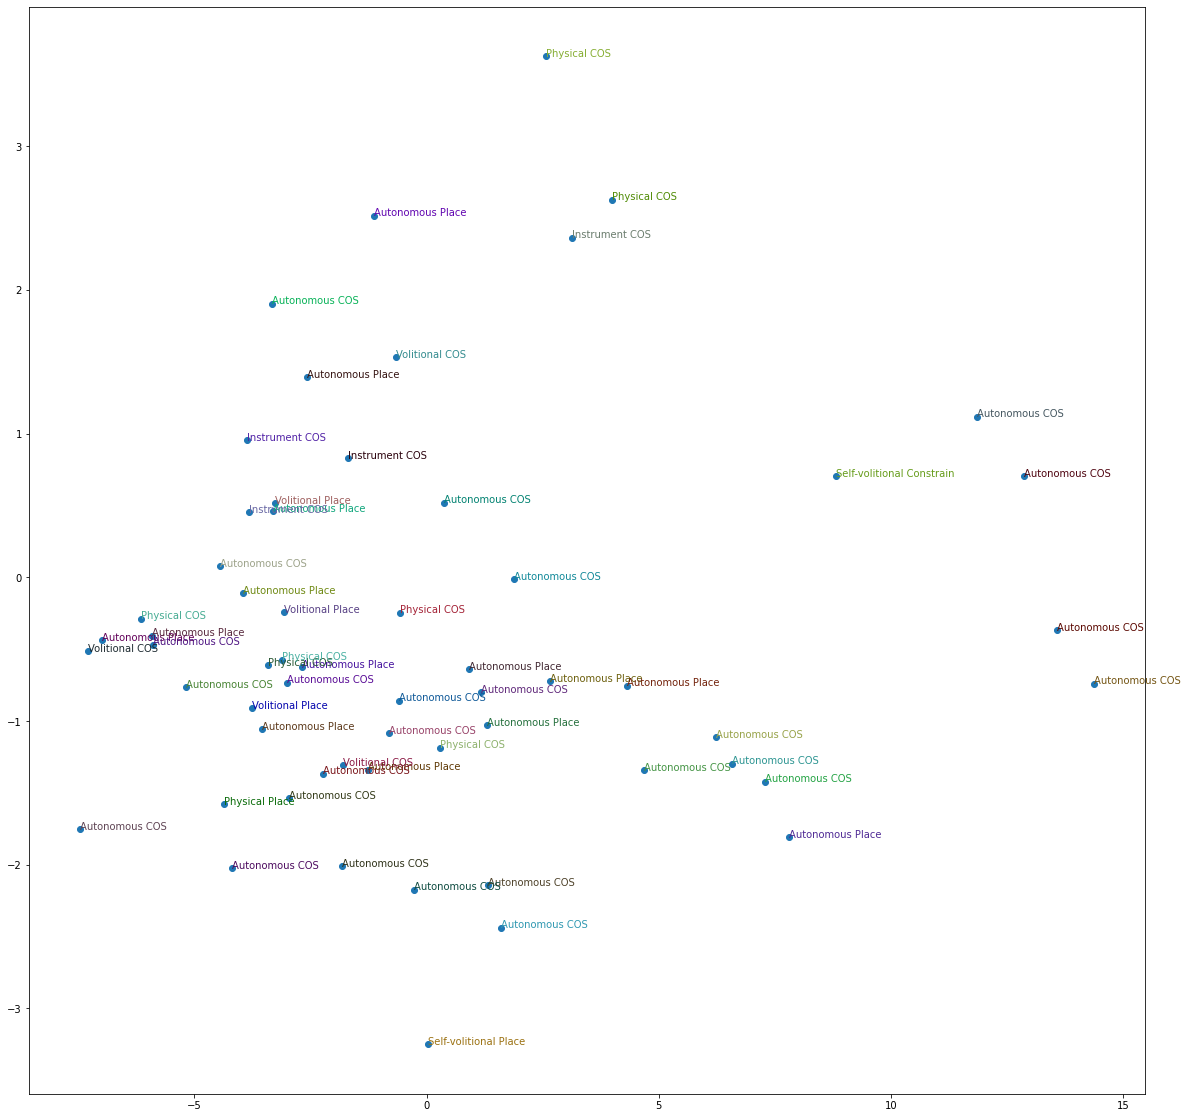

In [20]:
#idxs = np.random.choice(len(df.sentence), 100, replace=False)
#idxs = list(range(50))

cnt_path = 0
cnt_transitive = 0
cnt_intransitive = 0
cnt_result = 0
idxs = []
for idx, row in df.iterrows():
    if cnt_path < 15:
        if 'PathP' in row.syntax:
            idxs.append(int(idx))
            cnt_path +=1
            
    if cnt_transitive < 15:
        if row.syntax == 'Sbj V Obj':
            idxs.append(int(idx))
            cnt_transitive +=1
 
    if cnt_intransitive < 15:
        if row.syntax == 'Sbj V':
            idxs.append(int(idx))
            cnt_intransitive +=1

    if cnt_result < 15:
        if 'ResultP' in row.syntax:
            idxs.append(int(idx))
            cnt_result +=1
  
X = fac0[idxs]
Y = fac1[idxs]
plt.figure(figsize=(20,20))
plt.scatter(X,Y)
for i, x, y in zip(df.fd[idxs].to_list(), X, Y):
    plt.text(x, y, i, color=np.random.rand(3)*0.7, fontsize=10)
plt.show()

In [49]:
from sklearn.manifold import MDS
seed = np.random.RandomState(seed=3)
embedding = MDS(n_components=2)
p_transformed = embedding.fit_transform(p)

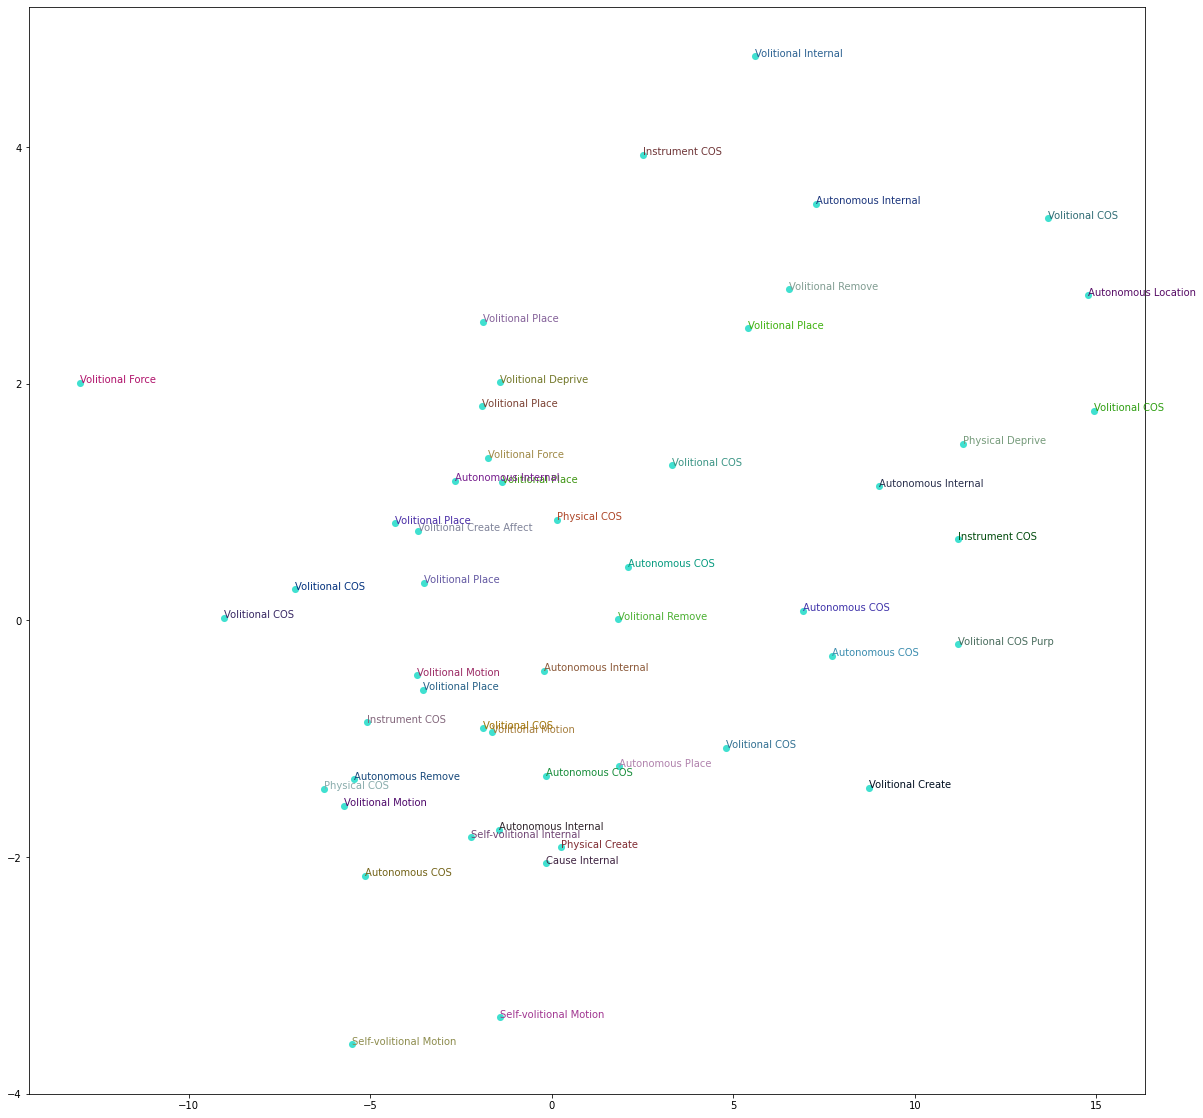

In [52]:
#these_idxs = list(range(50))
these_idxs = np.random.choice(len(df.sentence), 50, replace=False)
X_mds = p_transformed[:, 0][these_idxs]
Y_mds = p_transformed[:, 1][these_idxs]

s = len(these_idxs)
plt.figure(figsize=(20,20))
plt.scatter(X_mds, Y_mds, color='turquoise', s=s, lw=0, label='MDS')
for i, x, y in zip(df.fd[these_idxs].to_list(), X_mds, Y_mds):
    plt.text(x, y, i, color=np.random.rand(3)*0.7, fontsize=10)
plt.show()

In [42]:
from sklearn.cluster import KMeans

In [183]:
all_fd1 = []
df.fd.unique()
for item in df.fd.unique():
    all_fd1.append(item.split()[0])
all_fd1 = list(set(all_fd1))
all_fd1

['Inducive',
 'Volitional',
 'Autonomous',
 'Self-volitional',
 'Physical',
 'Instrument',
 'Cause',
 'Mutual']

In [192]:
all_fd2 = []
df.fd.unique()
for item in df.fd.unique():
    all_fd2.append(item.split()[1])
all_fd2 = list(set(all_fd2))
all_fd2

['Deprive',
 'Constrain',
 'Force',
 'COS',
 'Place',
 'Create',
 'Motion',
 'Internal',
 'Provide',
 'Dynamic',
 'Location',
 'Manipulate',
 'Remove',
 'Form']

In [202]:
kmeans = KMeans(n_clusters=3, random_state=None).fit(p)

In [203]:
kmeans.labels_

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       2, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 0, 2, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 2, 0, 0, 1, 2, 2, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 2,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1,

In [204]:
cluster = {}

for label, fd in zip(kmeans.labels_, df.fd):
    if label not in cluster:
        cluster[label]=[]
    cluster[label].append(fd.split()[1])

In [205]:
for k, v in cluster.items():
    print(k, v)
    print()

0 ['Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'Provide', 'Provide', 'Provide', 'Provide', 'Provide', 'Provide', 'Provide', 'Provide', 'Provide', 'Provide', 'Provide', 'Provide', 'Create', 'Create', 'Create', 'Create', 'Create', 'Create', 'Create', 'Create', 'Create', 'Create', 'Create', 'Create', 'Create', 'Create', 'Create', 'Create', 'Create', 'Dynamic', 'Dynamic', 'Dynamic', 'Dynamic', 'Force', 'Force', 'Force', 'Force', 'Force', 'Force', 'Force', 'Force', 'Force', 'Force', 'Forc

In [206]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering().fit(p)

In [207]:
for label, fd in zip(clustering.labels_, df.fd):
    if label not in cluster:
        cluster[label]=[]
    cluster[label].append(fd.split()[0])

In [208]:
for k, v in cluster.items():
    print(k, v)
    print()

0 ['Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'Place', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'COS', 'Provide', 'Provide', 'Provide', 'Provide', 'Provide', 'Provide', 'Provide', 'Provide', 'Provide', 'Provide', 'Provide', 'Provide', 'Create', 'Create', 'Create', 'Create', 'Create', 'Create', 'Create', 'Create', 'Create', 'Create', 'Create', 'Create', 'Create', 'Create', 'Create', 'Create', 'Create', 'Dynamic', 'Dynamic', 'Dynamic', 'Dynamic', 'Force', 'Force', 'Force', 'Force', 'Force', 'Force', 'Force', 'Force', 'Force', 'Force', 'Forc